# Car Prices Prediction AI
## Introduction
*In the world of cars, The prices of cars are not the same as the others. The sellers sell the cars with different prices, which makes it hard for the customers decide what price is the best suitable.*

*Car Stock Market Prices Prediction AI is a program tool that estimates and predicts the prices of cars in various stock markets, from different sellers.*

## Overview
*In this notebook will show how to define dataset, clean data, use train-test split function, train different models, and evaluate the accuracy of the models for our AI program.*


## Step 1: Prepare our Libraries for the project:

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Step 2: Define our dataset for the AI

In [2]:
df = pd.read_csv("car_prices.csv")

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Step 3: Cleaning Data from any missing values 
## and useless features

In [3]:
df = df.drop(columns = ["saledate", "vin", "color", "interior"])
df = df.dropna(subset=['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'seller', 'mmr', 'sellingprice'])

df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,financial services remarketing (lease),66000.0,67000.0


## Step 4: Encoding the Non-Numerical features

In [4]:
categorical_cols = [
    'make','model','trim','body','transmission','state','condition','seller'
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472869 entries, 0 to 558836
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472869 non-null  int64  
 1   make          472869 non-null  int64  
 2   model         472869 non-null  int64  
 3   trim          472869 non-null  int64  
 4   body          472869 non-null  int64  
 5   transmission  472869 non-null  int64  
 6   state         472869 non-null  int64  
 7   condition     472869 non-null  int64  
 8   odometer      472869 non-null  float64
 9   seller        472869 non-null  int64  
 10  mmr           472869 non-null  float64
 11  sellingprice  472869 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 46.9 MB


## Step 5: Divide features for train/test split 
* Features in X variable is input features.
* Features in Y variable is the target that our AI program will predict.

In [7]:
X = df[['year', 'make', 'model', 'transmission']]
y = df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Step 6: Create a Model for training and Evaluaion
#### There are two models we used here:
**1. Decision Tree Regression Implementation**

In [8]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

pred_dec = model1.predict(X_test)

MSE = mean_squared_error(y_test, pred_dec)

print("Test R²:", r2_score(y_test, pred_dec))
print("Test MAE:", mean_absolute_error(y_test, pred_dec))
print(MSE/y_test.var())

Test R²: 0.8949224625571366
Test MAE: 2063.6129805033793
0.1050764263812879


**2. Linear Regression Implementation**

In [9]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

pred_lin = model2.predict(X_test)

MSE = mean_squared_error(y_test, pred_lin)

print("Test R²:", r2_score(y_test, pred_lin))
print("Test MAE:", mean_absolute_error(y_test, pred_lin))
print(MSE/y_test.var())

Test R²: 0.34329446945593334
Test MAE: 5444.583300864372
0.6566985867166876


## Step 7: Visualize the accuracy of each model

In [11]:
def visual(y_test, pred):
    df_plot = pd.DataFrame({
        'Actual': y_test,
        'Predicted': pred
    })

    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Actual', y='Predicted', data=df_plot, alpha=0.6)
    sns.lineplot(x='Actual', y='Actual', data=df_plot, color='green')
    plt.title('Estimation Plot')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.show()

**1. Decision Tree Regressor Visualization**

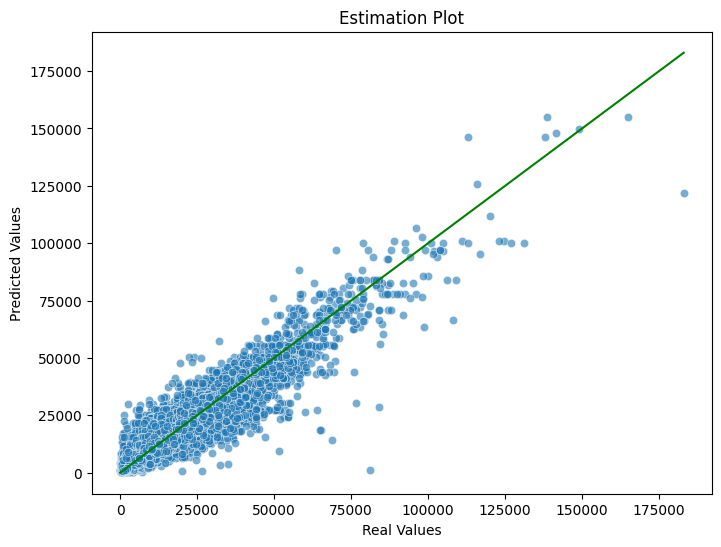

In [12]:
visual(y_test, pred_dec)

**2. Linear Regression Visualization**

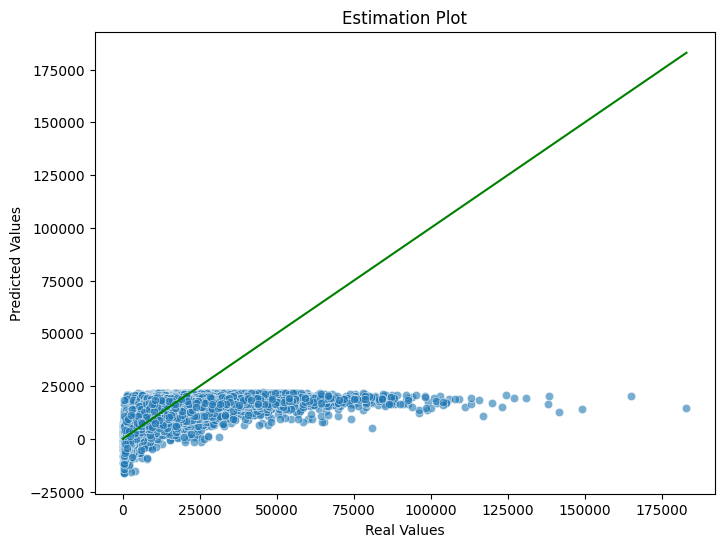

In [13]:
visual(y_test, pred_lin)

## After Preparing our model with the best accuracy,

## We created a GUI program for the user to use for car price prediction.

In [14]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd

class AutocompleteCombobox(ttk.Combobox):
    def set_completion_list(self, completion_list):
        self._completion_list = sorted(completion_list, key=str.lower)
        self['values'] = self._completion_list
        self._hits = []
        self.position = 0
        self.bind('<KeyRelease>', self._handle_keyrelease)

    def _autocomplete(self, delta=0):
        if delta:
            self.delete(self.position, tk.END)
        else:
            self.position = len(self.get())

        _hits = [item for item in self._completion_list if item.lower().startswith(self.get().lower())]
        if _hits != self._hits:
            self._hits = _hits
            if _hits:
                self['values'] = _hits
            else:
                self['values'] = self._completion_list

    def _handle_keyrelease(self, event):
        if event.keysym == "BackSpace":
            self.position = self.index(tk.END)
        self._autocomplete()

makes = list(label_encoders['make'].classes_)
models = list(label_encoders['model'].classes_)
transmissions = list(label_encoders['transmission'].classes_)

def predict_price():
    try:
        year_str = year_entry.get()
        if not year_str.isdigit() or not (1900 <= int(year_str) <= 2025):
            raise ValueError("Year must be between 1900 and 2025")

        year = int(year_str)
        make = make_combo.get()
        model_name = model_combo.get()
        transmission = transmission_combo.get()

        make_encoded = label_encoders['make'].transform([make])[0]
        model_encoded = label_encoders['model'].transform([model_name])[0]
        transmission_encoded = label_encoders['transmission'].transform([transmission])[0]

        input_df = pd.DataFrame([{
            'year': year,
            'make': make_encoded,
            'model': model_encoded,
            'transmission': transmission_encoded
        }])

        price_decision_tree = model1.predict(input_df)[0]
        price_linear = model2.predict(input_df)[0]

        result_label.config(
            text=f"Decision Tree Estimate: ${price_decision_tree:,.2f}\n"
                 f"Linear Regression Estimate: ${price_linear:,.2f}"
        )

    except ValueError as e:
        messagebox.showerror("Input Error", f"Please enter a valid year.\n{e}")

root = tk.Tk()
root.title("Car Price Predictor")
root.geometry("420x350")

tk.Label(root, text="Year").pack()
year_entry = tk.Entry(root)
year_entry.pack()

tk.Label(root, text="Make").pack()
make_combo = AutocompleteCombobox(root)
make_combo.set_completion_list(makes)
make_combo.pack()

tk.Label(root, text="Model").pack()
model_combo = AutocompleteCombobox(root)
model_combo.set_completion_list(models)
model_combo.pack()

tk.Label(root, text="Transmission").pack()
transmission_combo = AutocompleteCombobox(root)
transmission_combo.set_completion_list(transmissions)
transmission_combo.pack()

tk.Button(
    root,
    text="Predict Price",
    command=predict_price
).pack(pady=15)

result_label = tk.Label(root, text="", font=("Arial", 12, "bold"))
result_label.pack()

root.mainloop()


## Some outputs from our AI Program:

### Output 1:




<img src="Output1.jpg" alt="Image of Output 1">

### Output 2:







<img src="Output2.jpg" alt="Image of Output 2">